In [5]:
import pandas as pd


#1加载数据
data1=pd.read_excel("D:\数据分析\order_detail.xlsx",sheet_name='meal_order_detail1')
data2=pd.read_excel("D:\数据分析\order_detail.xlsx",sheet_name='meal_order_detail2')
data3=pd.read_excel("D:\数据分析\order_detail.xlsx",sheet_name='meal_order_detail3')
#2数据预处理（将NA处理,合并数据），分析数据
data=pd.concat([data1,data2,data3],axis=0) #按照行进行数据链接
#data.head(5)

data.dropna(axis=1,inplace=True) #按照列删除na,修改原数据
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [10]:
#统计出菜品的平均价格
import numpy as np
round(data['amounts'].mean(),2) #pandas自带函数
round(np.mean(data['amounts']),2) #numpy函数处理

44.82

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '白饭/大碗'),
  Text(1, 0, '凉拌菠菜'),
  Text(2, 0, '谷稻小庄 '),
  Text(3, 0, '麻辣小龙虾'),
  Text(4, 0, '辣炒鱿鱼'),
  Text(5, 0, '芝士烩波士顿龙虾'),
  Text(6, 0, '五色糯米饭(七色)'),
  Text(7, 0, '白饭/小碗'),
  Text(8, 0, '香酥两吃大虾'),
  Text(9, 0, '焖猪手')])

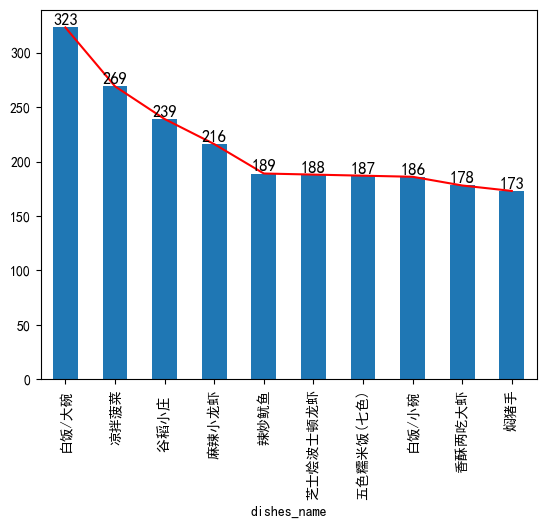

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示

#频数统计 什么菜最受欢迎  （取出菜名列 进行计数）
dishes_count=data['dishes_name'].value_counts()[:10]

#数据可视化matplotlib
dishes_count.plot(kind='bar')
dishes_count.plot(kind='line',color=['r'])
for x,y in enumerate(dishes_count):
    plt.text(x,y+2,y,ha='center',fontsize=12)
    
# 设置x轴标签为竖直显示
plt.xticks(rotation=90)

Text(0, 0.5, '点菜种类')

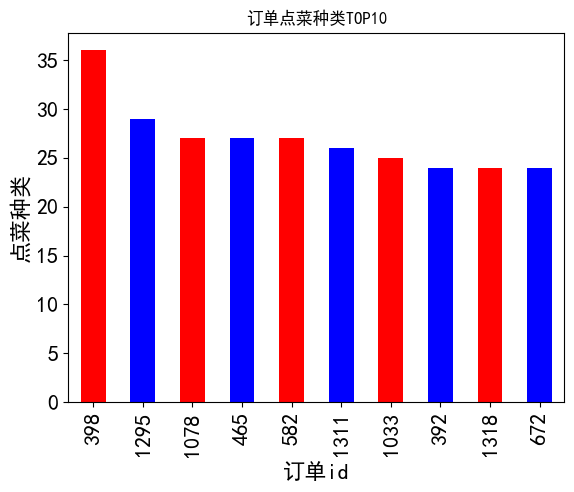

In [28]:
#订单点菜的 种类 最多
data_group=data['order_id'].value_counts()[:10]
data_group
data_group.plot(kind='bar',fontsize=16,color=['r','b'])
plt.title('订单点菜种类TOP10')
plt.xlabel('订单id',fontsize=16)
plt.ylabel('点菜种类',fontsize=16)
#八月份餐厅订单点菜种类前十名，平均点菜25份

Text(0.5, 1.0, '订单ID点菜数量Top10')

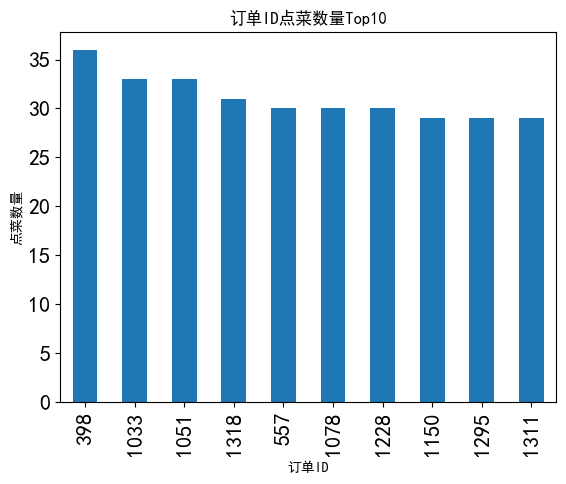

In [29]:
#订单ID点菜 数量 Top10 （分组order_id,counts求和，排序，前十）
data['total_amounts'] =data['counts']*data['amounts']  #统计单道菜消费总额
dataGroup = data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
Group_sum = dataGroup.sum()  #分组求和
sort_counts = Group_sum.sort_values(by='counts',ascending=False)
sort_counts['counts'][:10].plot(kind='bar',fontsize=16)
plt.xlabel('订单ID')
plt.ylabel('点菜数量')
plt.title('订单ID点菜数量Top10')
#8月份订单点菜 数量 前10名,平均数量在30份

Text(0.5, 1.0, '消费金额前10')

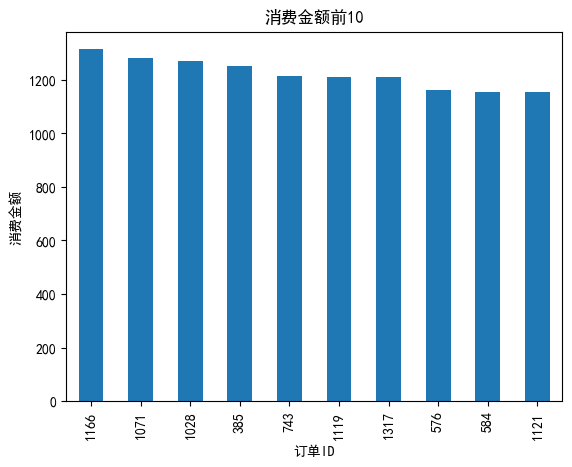

In [30]:
#哪个订单ID吃的钱做多（排序）
sort_total_amounts = Group_sum.sort_values(by='total_amounts',ascending=False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费金额')
plt.title('消费金额前10')

Text(0.5, 1.0, '订单消费单价前10')

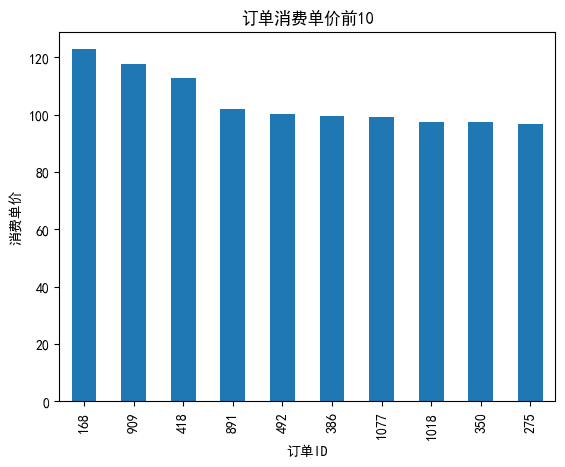

In [34]:
#哪个订单ID平均消费最贵  （总价除以种类）
Group_sum['average'] = Group_sum['total_amounts']/Group_sum['counts']
#Group_sum
sort_average = Group_sum.sort_values(by='average',ascending=False)
sort_average['average'][:10].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费单价')
plt.title('订单消费单价前10')

Text(0.5, 1.0, '点菜数与小时的关系图')

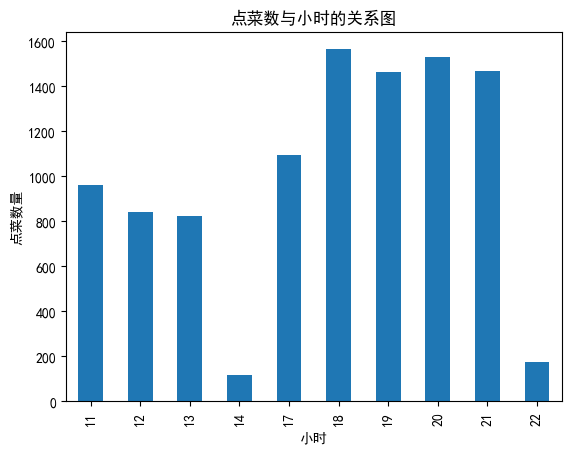

In [35]:
#一天当中什么时间段，点菜量比较集中（hour）
data['hourcount'] = 1 # 新列，用作计数器
data['time'] = pd.to_datetime(data['place_order_time']) #将时间转换成日期类型存储
data['hour'] = data['time'].map(lambda x:x.hour)
gp_by_hour = data.groupby(by='hour').count()['hourcount']
gp_by_hour.plot(kind='bar')
plt.xlabel('小时')
plt.ylabel('点菜数量')
plt.title('点菜数与小时的关系图')

Text(0.5, 1.0, '点菜数量与日期的关系图')

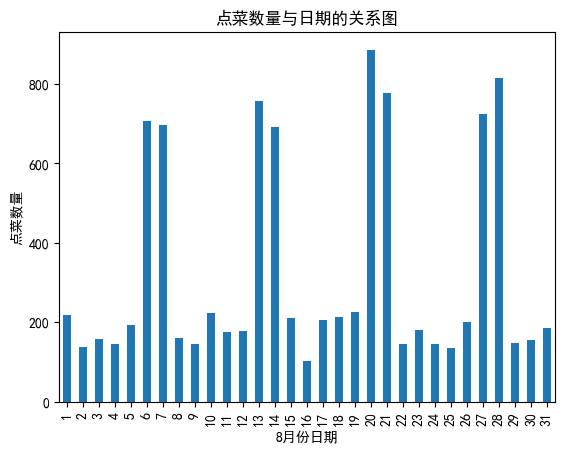

In [47]:
#哪一天订餐数量最多
data['daycount'] = 1  
data['day'] = data['time'].map(lambda x:x.day)  #解析出天
gp_by_day  = data.groupby(by='day').count()['daycount']
gp_by_day.plot(kind='bar')
plt.xlabel('8月份日期')
plt.ylabel('点菜数量')
plt.title('点菜数量与日期的关系图')


([<matplotlib.axis.XTick at 0x2019980c490>,
 [Text(20, 0, '20日'),
  Text(28, 0, '28日'),
  Text(21, 0, '21日'),
  Text(13, 0, '13日'),
  Text(27, 0, '27日')])

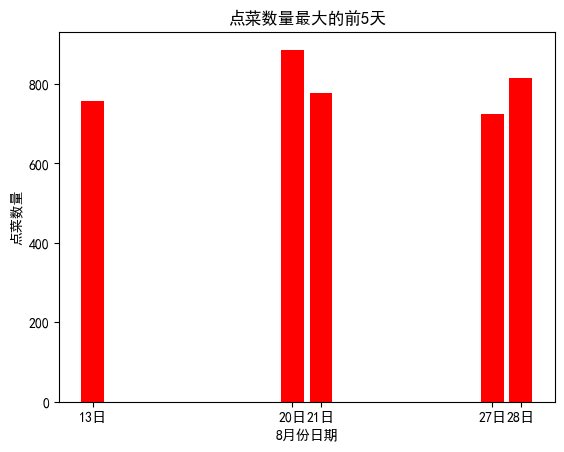

In [67]:
#拓展：排序，取点菜量最大的前5天
top5_days = gp_by_day.sort_values(ascending=False).head(5)
plt.bar(top5_days.index, top5_days.values, color='red')

plt.xlabel('8月份日期')
plt.ylabel('点菜数量')
plt.title('点菜数量最大的前5天')
plt.xticks(top5_days.index, [f'{day}日' for day in top5_days.index])
